<a href="https://colab.research.google.com/github/BeMindYou/Lesson/blob/main/Assessment_Tools/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


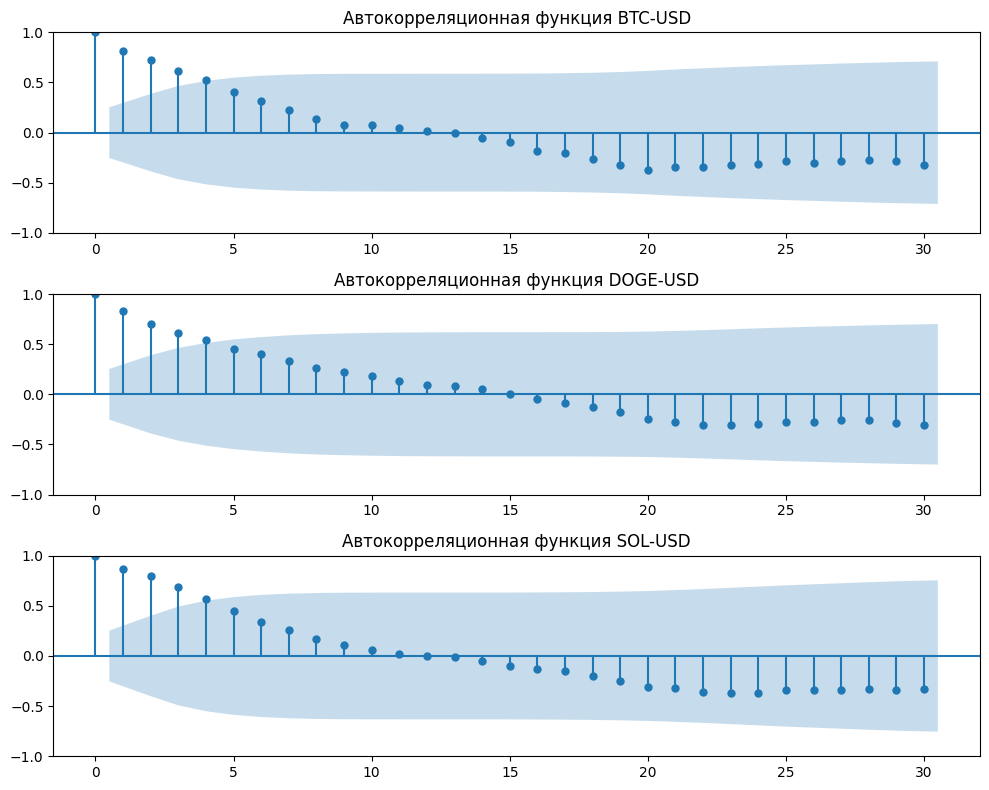

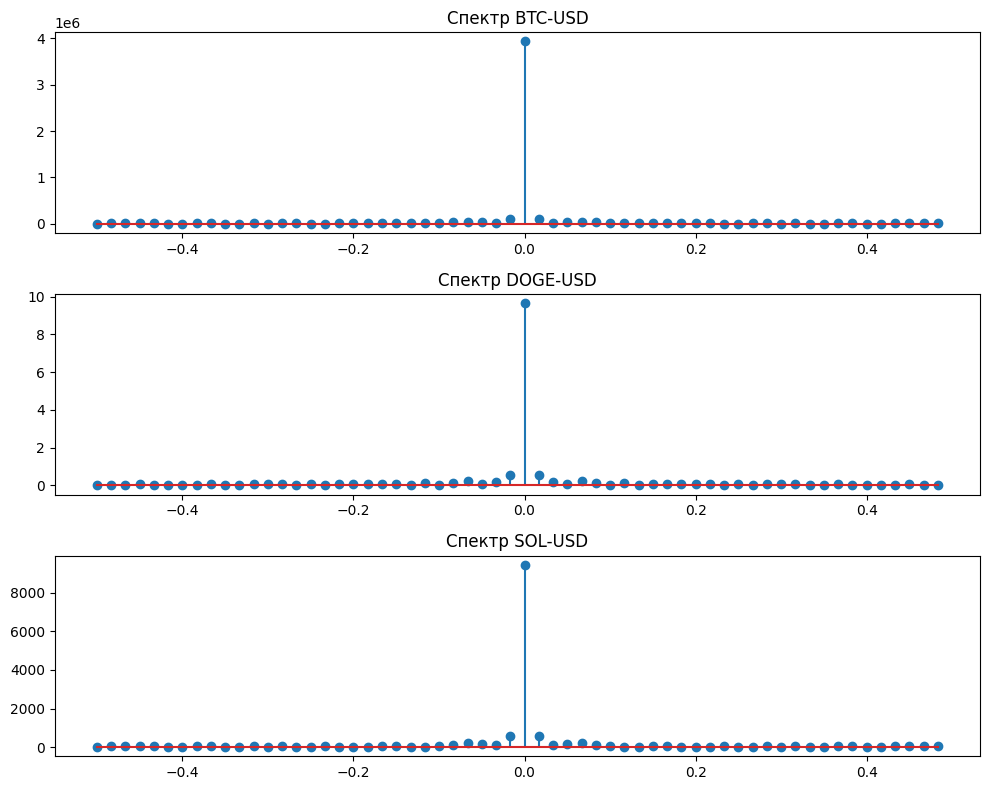

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Загрузка данных
btc = yf.download("BTC-USD", start="2024-04-01", end="2024-05-31", interval="1d")
doge = yf.download("DOGE-USD", start="2024-04-01", end="2024-05-31", interval="1d")
sol = yf.download("SOL-USD", start="2024-04-01", end="2024-05-31", interval="1d")

# Автокорреляционная функция (ACF)
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

plot_acf(btc["Close"], ax=axes[0], lags=30)
axes[0].set_title("Автокорреляционная функция BTC-USD")

plot_acf(doge["Close"], ax=axes[1], lags=30)
axes[1].set_title("Автокорреляционная функция DOGE-USD")

plot_acf(sol["Close"], ax=axes[2], lags=30)
axes[2].set_title("Автокорреляционная функция SOL-USD")

plt.tight_layout()
plt.show()

# Спектральный анализ
max_len = max(len(btc["Close"]), len(doge["Close"]), len(sol["Close"]))

btc_padded = np.pad(btc["Close"], (0, max_len - len(btc["Close"])), mode='constant')
doge_padded = np.pad(doge["Close"], (0, max_len - len(doge["Close"])), mode='constant')
sol_padded = np.pad(sol["Close"], (0, max_len - len(sol["Close"])), mode='constant')

btc_spectrum = np.fft.fft(btc_padded)
doge_spectrum = np.fft.fft(doge_padded)
sol_spectrum = np.fft.fft(sol_padded)

freq = np.fft.fftfreq(max_len, d=1)

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].stem(freq, np.abs(btc_spectrum))
axes[0].set_title("Спектр BTC-USD")

axes[1].stem(freq, np.abs(doge_spectrum))
axes[1].set_title("Спектр DOGE-USD")

axes[2].stem(freq, np.abs(sol_spectrum))
axes[2].set_title("Спектр SOL-USD")

plt.tight_layout()
plt.show()